In [19]:
from langgraph.graph import StateGraph,START,END
from typing import TypedDict



In [20]:
class BatsmanState(TypedDict):

    runs: int
    balls: int
    fours: int
    sixes: int

    sr: float
    bpb:float
    boundry_percent:float
    summary:str


In [21]:
def calculate_sr(state: BatsmanState):
    sr =(state['runs']/state['balls'])/100
    state['sr']=sr
    return state


def calculate_bpb(state: BatsmanState):
    if state["balls"]==0:
        raise Exception('Balls cannot be zero')
    else:
        pass
    state['bpb']=(state['balls']/state['fours']+state['sixes'])
    return state


def calculate_boundry_percent(state: BatsmanState):
    if state["balls"]==0:
        raise Exception('Balls cannot be zero')
    else:
        ((state['fours']*4)+(state['sixes']*6)/state['runs'])*100
    return state

def calculate_summary(state: BatsmanState):
    summary= f"""
    Strike Rate - {state['sr']}\n    
    Boundary Percentage - {state['boundry_percent']}\n    
    Balls per boundry - {state['bpb']}
    """
    state['summary'] = summary
    return state



In [25]:
graph=StateGraph(BatsmanState)
graph.add_node("calculate_sr", calculate_sr)
graph.add_node("calculatate_bpb", calculate_bpb)
graph.add_node("calculatate_boundry_percent", calculate_boundry_percent)
graph.add_node("summary", calculate_summary)

#edges
graph.add_edge(START, "calculate_sr")
graph.add_edge(START, "calculatate_bpb")
graph.add_edge(START, "calculatate_boundry_percent")

graph.add_edge("calculate_sr","summary")
graph.add_edge("calculatate_bpb","summary")
graph.add_edge("calculatate_boundry_percent","summary")

graph.add_edge("summary",END)




In [26]:
workflow = graph.compile()

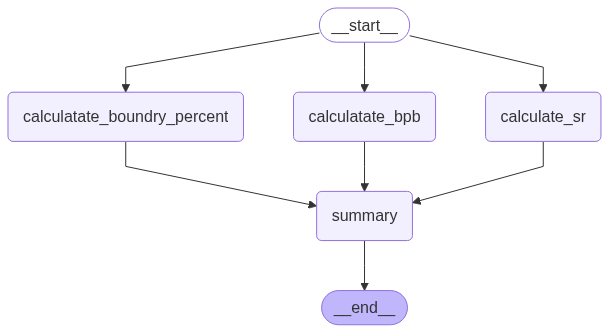

In [27]:
workflow